In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from tf_spectral import spectral as tsp
from tf_spectral.core import tensorops as tops

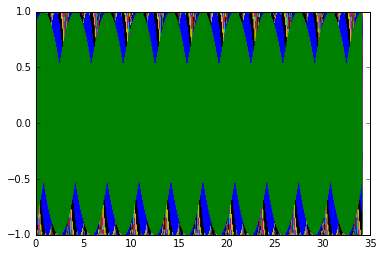

In [2]:
# make a test set of streams

def gen_sine(f0, fs, dur):
    t = np.arange(dur)
    sinusoid = np.sin(2*np.pi*t*(f0/fs))
    #sinusoid = normalise(sinusoid)
    return sinusoid, t/fs

samples_fft = 1024
s_f = 30000.
x_stk = []
t_stk = []
# prepare an array of 100 time series
for f0 in [100*i for i in range(100)]:
    x, t = gen_sine(f0, s_f, 3000.)
    x_stk.append(x[:samples_fft])
    t_stk.append(t[:samples_fft])
    
x_arr = np.vstack(x_stk)
t_arr = np.vstack(t_stk)

plt.plot(t_arr.T*1000, x_arr.T);

In [ ]:
# view the ffts
reload(tops)
y = tops.real_fft(x_arr)
ny_f = s_f/2;
f = np.arange(int(samples_fft/2))/int(samples_fft/2)*ny_f
plt.figure()
plt.plot(f, y[:,:].T);

In [4]:
# times for cpu vs gpu
%timeit for i in range(10): tops.real_fft(x_arr, device='/gpu:0')

1 loop, best of 3: 275 ms per loop


In [5]:
%timeit for i in range(10): tops.real_fft(x_arr, device='/cpu:0')

1 loop, best of 3: 766 ms per loop
